**Tools - matplotlib**

*This notebook demonstrates how to use the matplotlib library to plot beautiful graphs.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-mlp/blob/main/tools_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-mlp/blob/main/tools_matplotlib.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Plotting your first graph

First we need to import the `matplotlib` library.

In [1]:
import matplotlib

Now let's plot our first graph! :)

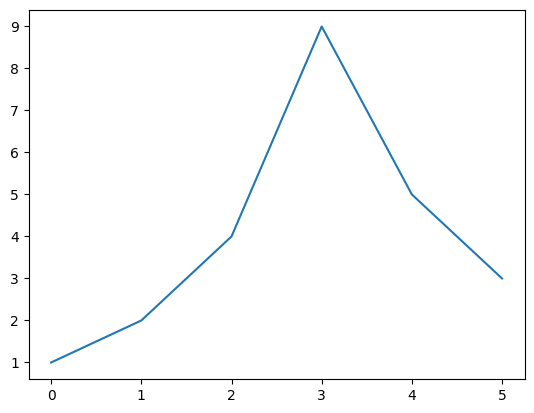

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

Yep, it's as simple as calling the `plot` function with some data, and then calling the `show` function!

**Note**:

> Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc. When running Python using the command line, you may want to specify which backend to use right after importing matplotlib and before plotting anything. For example, to use the Tk backend, run `matplotlib.use("TKAgg")`.
> However, in a Jupyter notebook, things are easier: importing `import matplotlib.pyplot` automatically registers Jupyter itself as a backend, so the graphs show up directly within the notebook. It used to require running `%matplotlib inline`, so you'll still see it in some notebooks, but it's not needed anymore.

If the `plot` function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate.
You can also provide two arrays: one for the horizontal axis `x`, and the second for the vertical axis `y`:

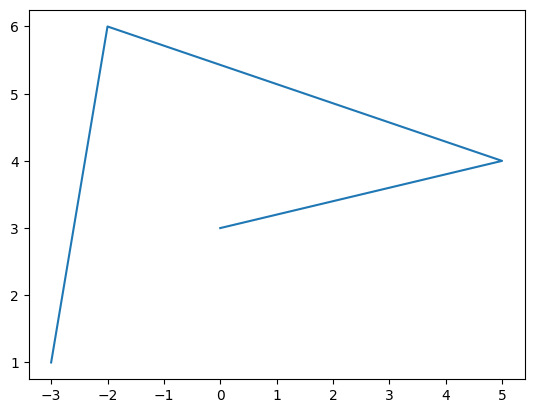

In [3]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

The axes automatically match the extent of the data. We would like to give the graph a bit more room, so let's call the `axis` function to change the extent of each axis `[xmin, xmax, ymin, ymax]`.

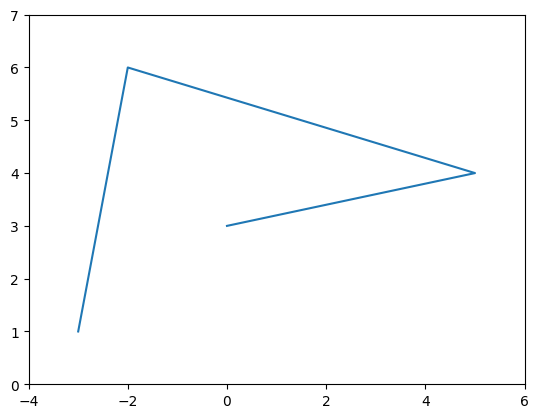

In [4]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0, 7])
plt.show()

Now, let's plot a mathematical function. We use NumPy's `linspace` function to create an array `x` containing 500 floats ranging from -2 to 2, then we create a second array `y` computed as the square of `x` (to learn about NumPy, read the [NumPy tutorial](tools_numpy.ipynb)).

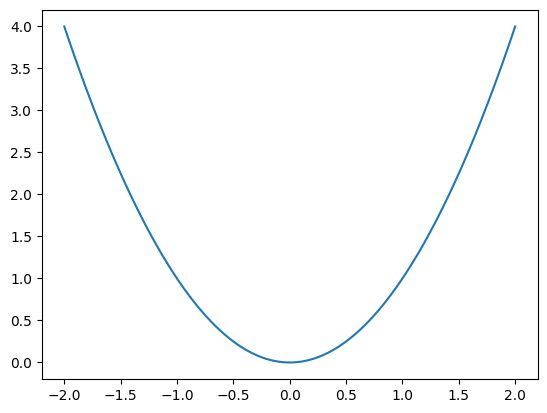

In [5]:
import numpy as np

x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

That's a bit dry, let's add a title, and x and y labels, and draw a grid.

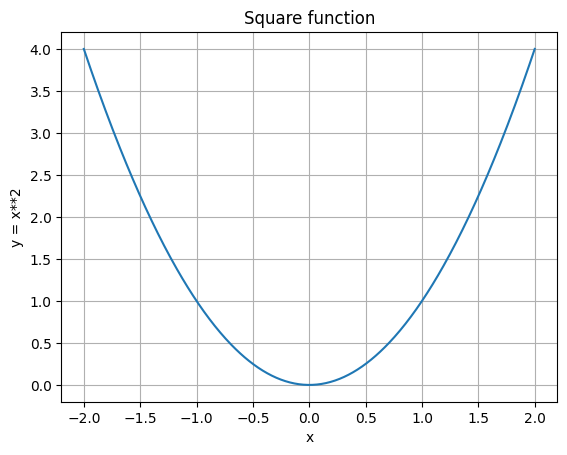

In [6]:
plt.plot(x, y)
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show()

# Line style and color

By default, matplotlib draws a line between consecutive points.

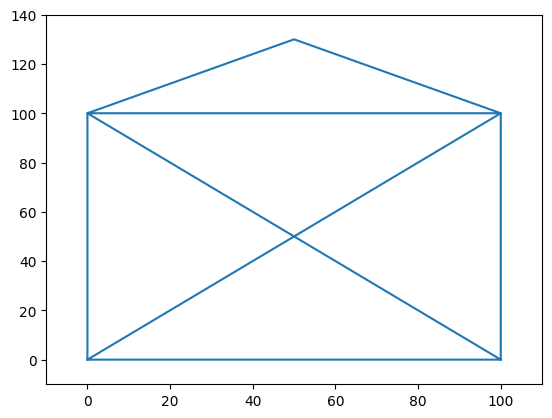

In [7]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100],
         [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()

You can pass the 3rd argument to change the line's style and color.
For example `"g--"` means "green dashed line".

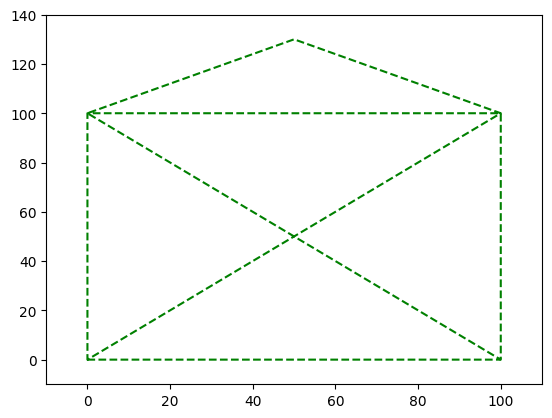

In [8]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100],
         [0, 0, 100, 100, 0, 100, 130, 100, 0],
         "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

You can plot multiple lines on one graph very simply: just pass `x1, y1, [style1], x2, y2, [style2], ...`

For example:

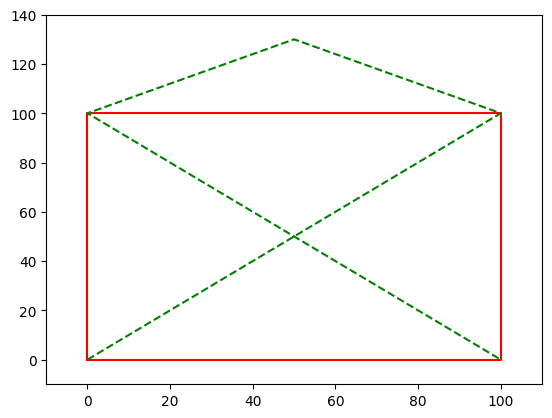

In [9]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-",
         [0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

Or simply call `plot` multiple times before calling `show`.

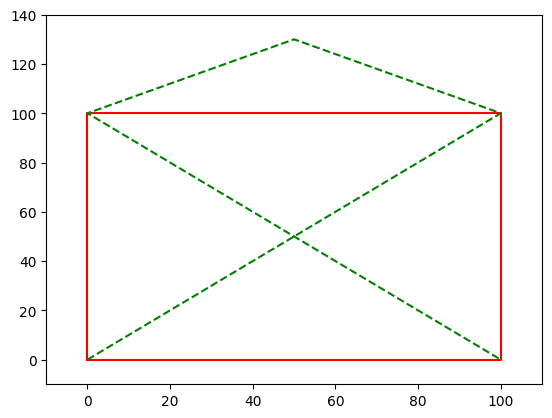

In [10]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-")
plt.plot([0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles.
Check out [the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for the full list of style & color options.

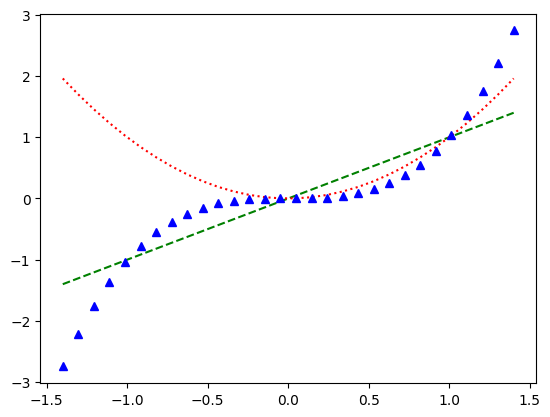

In [11]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

The plot function returns a list of `Line2D` objects (one for each line). You can set extra properties on these lines, such as the line width, the dash style or the alpha level. See the full list of properties in [the documentation](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#controlling-line-properties).

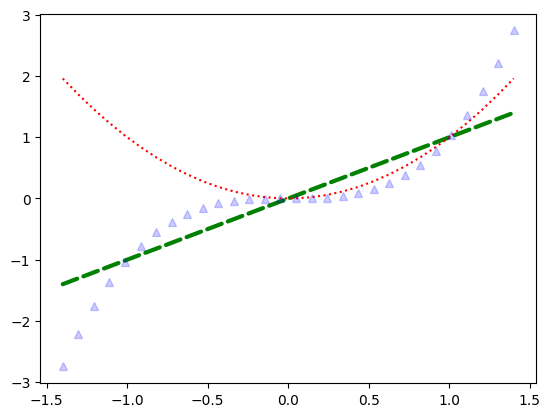

In [12]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

# Saving a figure
Saving a figure to disk is as simple as calling [`savefig`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

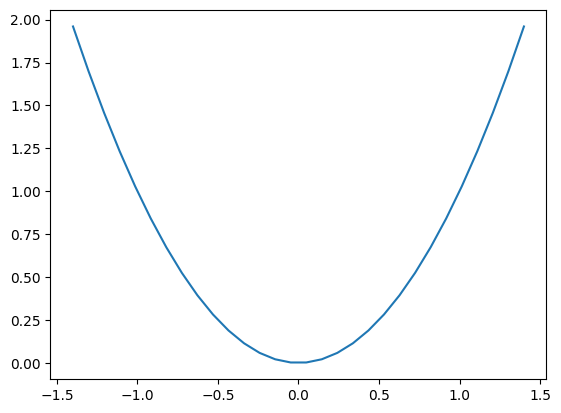

In [13]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=True)

# Subplots
A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the `subplot` function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the *active* subplot.


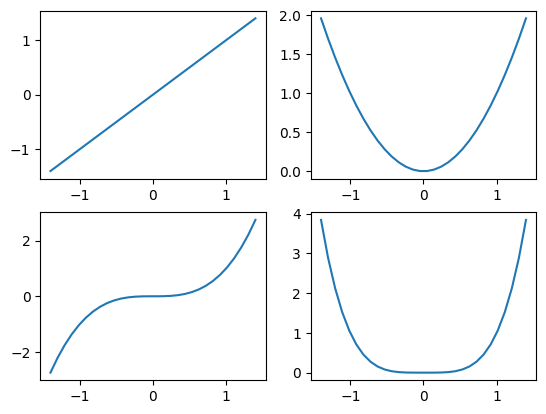

In [14]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottom left
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show()

* Note that `subplot(223)` is a shorthand for `subplot(2, 2, 3)`.

It is easy to create subplots that span across multiple grid cells like so:

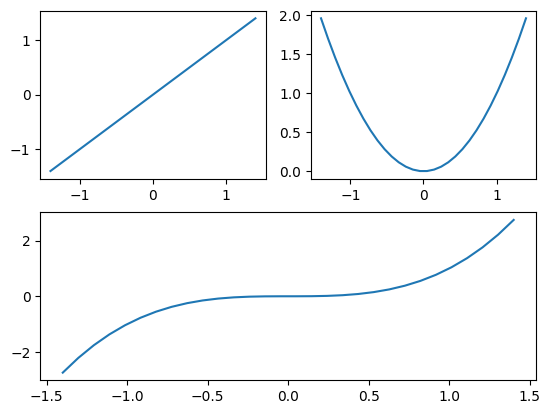

In [15]:
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show()

If you need more complex subplot positioning, you can use `subplot2grid` instead of `subplot`. You specify the number of rows and columns in the grid, then your subplot's position in that grid (top-left = (0,0)), and optionally how many rows and/or columns it spans. For example:

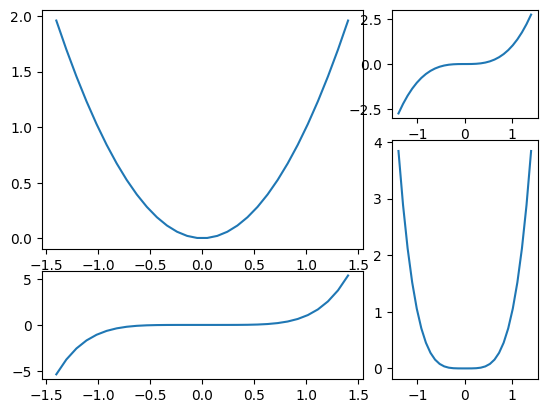

In [16]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

If you need even more flexibility in subplot positioning, check out the [corresponding matplotlib tutorial](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html).

# Multiple figures
It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates `figure(1)` automatically. When you switch figure, pyplot keeps track of the currently active figure (which you can get a reference to by calling `plt.gcf()`), and the active subplot of that figure becomes the current subplot.

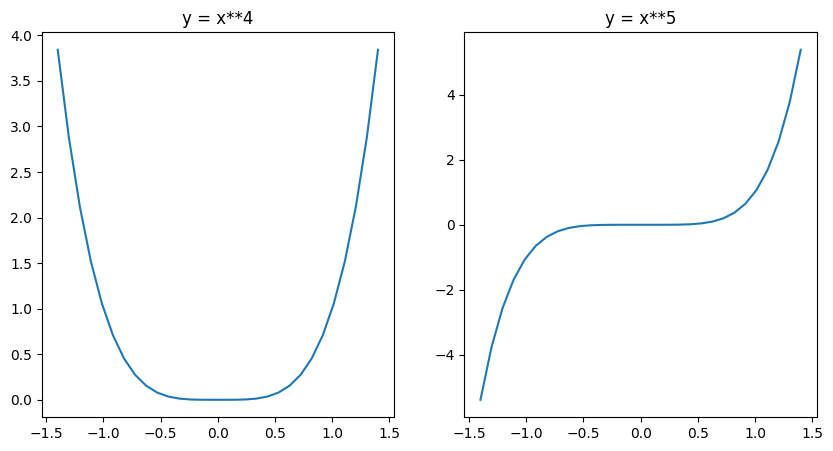

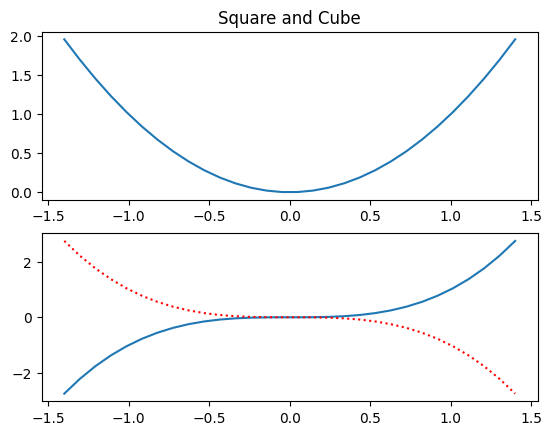

In [17]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, "r:")

plt.show()

# Pyplot's state machine: implicit *vs* explicit
So far we have used Pyplot's state machine which keeps track of the currently active subplot. Every time you call the `plot` function, pyplot just draws on the currently active subplot. It also does some more magic, such as automatically creating a figure and a subplot when you call `plot`, if they don't exist yet. This magic is convenient in an interactive environment (such as Jupyter).

But when you are writing a program, *explicit is better than implicit*. Explicit code is usually easier to debug and maintain, and if you don't believe me just read the 2nd rule in the Zen of Python:

In [18]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Fortunately, Pyplot allows you to ignore the state machine entirely, so you can write beautifully explicit code. Simply call the `subplots` function and use the figure object and the list of axes objects that are returned. No more magic! For example:

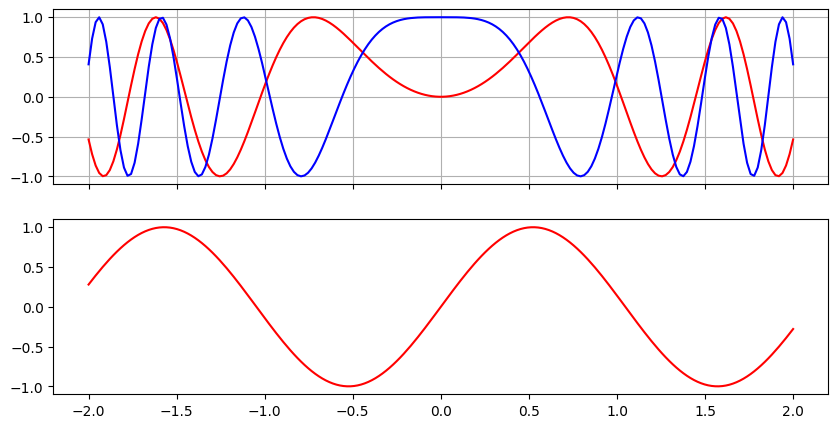

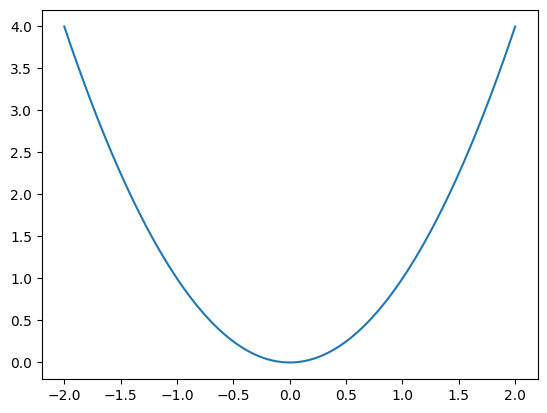

In [19]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)

fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
plt.show()

For consistency, we will continue to use pyplot's state machine in the rest of this tutorial, but we recommend using the object-oriented interface in your programs.

# Pylab *vs* Pyplot *vs* Matplotlib

There is some confusion around the relationship between pylab, pyplot and matplotlib. It's simple: matplotlib is the full library, it contains everything including pylab and pyplot.

Pyplot provides a number of tools to plot graphs, including the state-machine interface to the underlying object-oriented plotting library.

Pylab is a convenience module that imports matplotlib.pyplot and NumPy within a single namespace. You will find many examples using pylab, but it is now [strongly discouraged](https://matplotlib.org/stable/api/index.html#module-pylab) (because *explicit* imports are better than *implicit* ones).

# Drawing text
You can call `text` to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra arguments. Any text in matplotlib may contain TeX equation expressions, see [the documentation](https://matplotlib.org/stable/tutorials/text/mathtext.html) for more details.

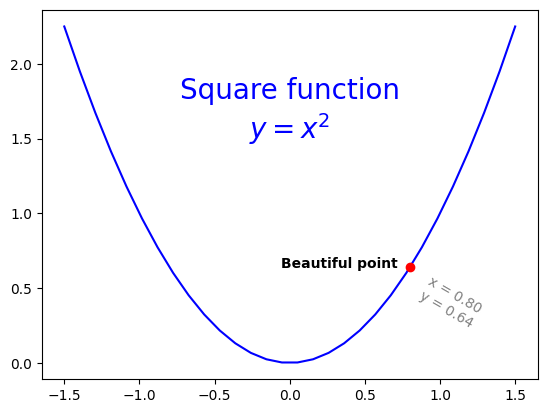

In [20]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue',
         horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px + 0.05, py - 0.4, "x = %0.2f\ny = %0.2f"%(px, py), rotation=-30,
         color='gray')

plt.show()

* Note: `ha` is an alias for `horizontalalignment`

For more text properties, visit [the documentation](https://matplotlib.org/stable/tutorials/text/text_props.html).

Every so often it is required to annotate elements of a graph, such as the beautiful point above. The `annotate` function makes it easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra arguments for the text and the arrow.

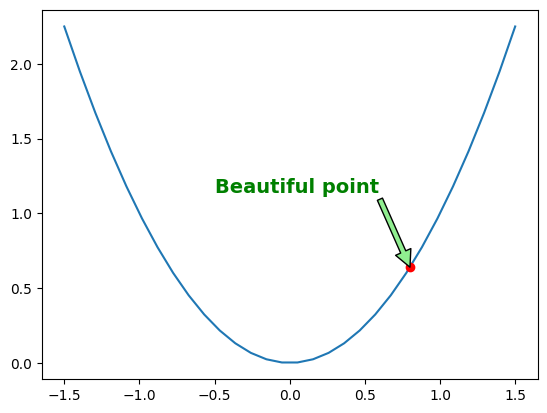

In [21]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.3,py+0.5),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.show()

You can also add a bounding box around your text by using the `bbox` argument:

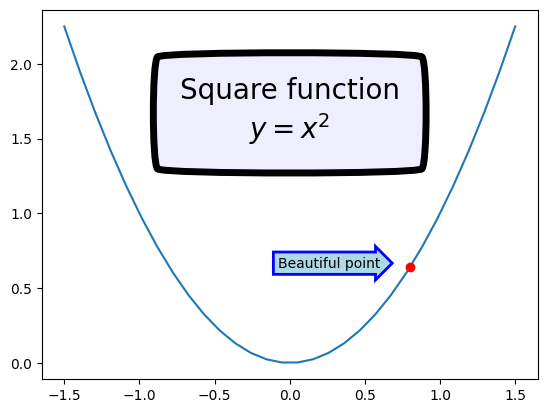

In [22]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black',
         ha="center", bbox=bbox_props)

plt.show()

Just for fun, if you want an [xkcd](https://xkcd.com)-style plot, just draw within a `with plt.xkcd()` section:

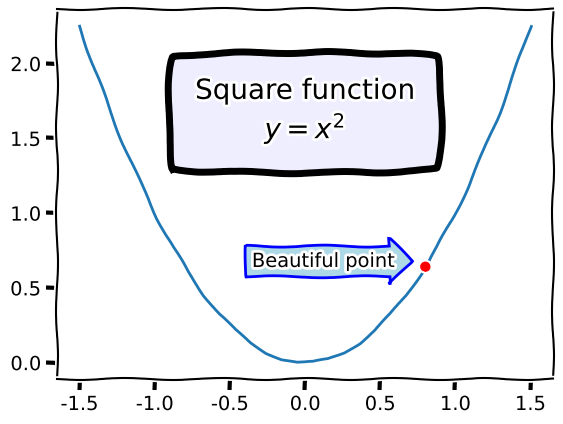

In [23]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black",
                      fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black',
             ha="center", bbox=bbox_props)

    plt.show()

# Legends
The simplest way to add a legend is to set a label on all lines, then just call the `legend` function.

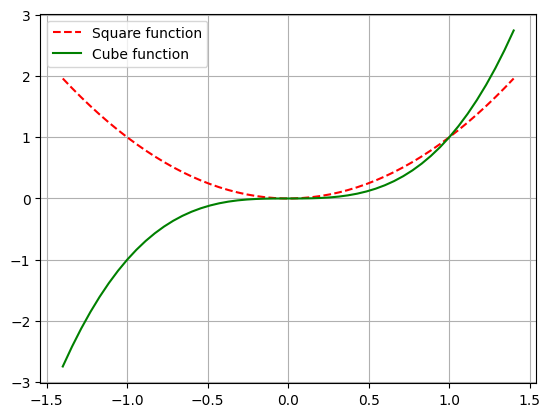

In [24]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Non-linear scales
Matplotlib supports non-linear scales, such as logarithmic or logit scales.

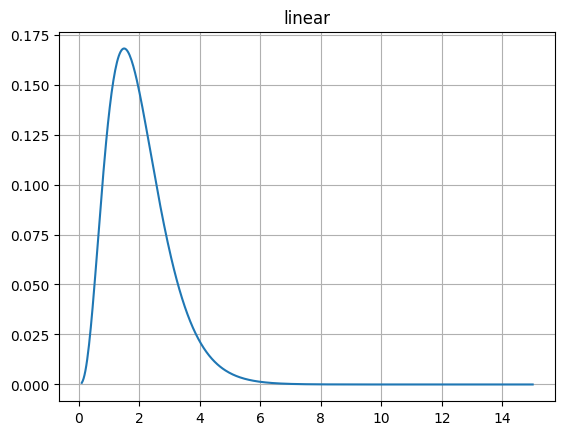

In [ ]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.figure(3)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.figure(4)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.05)
plt.title('symlog')
plt.grid(True)

plt.show()

# Ticks and tickers
The axes have little marks called "ticks". To be precise, "ticks" are the *locations* of the marks (e.g. (-1, 0, 1)), "tick lines" are the small lines drawn at those locations, "tick labels" are the labels drawn next to the tick lines, and "tickers" are objects that are capable of deciding where to place ticks. The default tickers typically do a pretty good job at placing ~5 to 8 ticks at a reasonable distance from one another.

But sometimes you need more control (e.g. there are too many tick labels on the logit graph above). Fortunately, matplotlib gives you full control over ticks. You can even activate minor ticks.


In [ ]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("Default ticks")

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.grid(True)
plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")

plt.show()

# Polar projection
Drawing a polar graph is as easy as setting the `projection` argument to `"polar"` when creating the subplot.

In [ ]:
radius = 1
theta = np.linspace(0, 2*np.pi*radius, 1000)

plt.subplot(111, projection='polar')
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")
plt.show()

# 3D projection

Plotting 3D graphs is quite straightforward: when creating a subplot, set the `projection` to `"3d"`. It returns a 3D axes object, which you can use to call `plot_surface`, providing x, y, and z coordinates, plus other optional arguments. For more information on generating 3D plots, check out the [matplotlib tutorial](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html).

In [ ]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1,
                                 cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()


Another way to display this same data is *via* a contour plot.

In [ ]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

# Scatter plot

To draw a scatter plot, simply provide the x and y coordinates of the points.

In [ ]:
rng = np.random.default_rng(seed=42)
x, y = rng.random((2, 100))
plt.scatter(x, y)
plt.show()

You may also optionally provide the scale of each point.

In [ ]:
rng = np.random.default_rng(seed=42)
x, y, scale = rng.random((3, 100))
scale = 500 * scale ** 5
plt.scatter(x, y, s=scale)
plt.show()

And as usual there are a number of other arguments you can provide, such as the fill and edge colors and the alpha level.

In [ ]:
rng = np.random.default_rng(seed=42)
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rng.random((2, n))
    scale = 500.0 * rng.random(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()


# Lines
You can draw lines simply using the `plot` function, as we have done so far. However, it is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept. You can also use the `hlines` and `vlines` functions that plot horizontal and vertical line segments.
For example:

In [ ]:
def plot_line(axis, slope, intercept, **kwargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax],
             [xmin*slope+intercept, xmax*slope+intercept],
             **kwargs)

rng = np.random.default_rng(seed=42)
x = rng.standard_normal(1000)
y = 0.5*x + 5 + rng.standard_normal(1000) * 2
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plt.plot(1, 0, "ro")
plt.vlines(1, -5, 0, color="red")
plt.hlines(0, -2.5, 1, color="red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)
plt.show()

# Histograms

In [ ]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

In [ ]:
rng = np.random.default_rng(seed=42)
data1 = rng.standard_normal(400)
data2 = rng.standard_normal(500) + 3
data3 = rng.standard_normal(450) + 6
data4a = rng.standard_normal(200) + 9
data4b = rng.standard_normal(100) + 10

plt.hist(data1, bins=5, color='g', alpha=0.75, histtype='bar',  # default type
         label='bar hist')
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled',
         label='stepfilled hist')
plt.hist(data3, color='r', histtype='step', label='step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked',
         label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Images
Reading, generating and plotting images in matplotlib is quite straightforward.

To read an image, just import the `matplotlib.image` module, and call its `imread` function, passing it the file name (or file object). It returns the image data, as a NumPy array. Let's try it with the `my_square_function.png` image we saved earlier.

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread("my_square_function.png")
print(img.shape, img.dtype)

We have loaded a 288x432 image. Each pixel is represented by a 4-element array: red, green, blue, and alpha levels, stored as 32-bit floats between 0 and 1. Now all we need to do is to call `imshow`:

In [ ]:
plt.imshow(img)
plt.show()

Tadaaa! You may want to hide the axes when you are displaying an image:

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

Under the hood, `imread()` uses the Python Image Library (PIL), and Matplotlib's documentation now recommends using PIL directly:

In [ ]:
import PIL

img = np.asarray(PIL.Image.open("my_square_function.png"))
print(img.shape, img.dtype)

Note that the array now contains unsigned 8-bit integers (from 0 to 255), but that's fine as `plt.imshow()` supports this format as well:

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

You can also generate an image from scratch:

In [ ]:
img = np.arange(100*100).reshape(100, 100)
print(img)
plt.imshow(img)
plt.show()

As we did not provide RGB levels, the `imshow` function automatically maps values to a color gradient. By default, the color gradient goes from blue (for low values) to yellow (for high values), but you can select another color map. For example:

In [ ]:
plt.imshow(img, cmap="hot")
plt.show()

You can also generate an RGB image directly:

In [ ]:
img = np.empty((20,30,3))
img[:, :10] = [0, 0, 0.6]
img[:, 10:20] = [1, 1, 1]
img[:, 20:] = [0.6, 0, 0]
plt.imshow(img)
plt.show()

Since the `img` array is just quite small (20x30), when the `imshow` function displays it, it grows the image to the figure's size. Imagine stretching the original image, leaving blanks between the original pixels. How does imshow fill the blanks? Well, by default, it just colors each blank pixel using the color of the nearest non-blank pixel. This technique can lead to pixelated images. If you prefer, you can use a different interpolation method, such as [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation) to fill the blank pixels. This leads to blurry edges, which may be nicer in some cases:

In [ ]:
plt.imshow(img, interpolation="bilinear")
plt.show()

# Animations
Although matplotlib is mostly used to generate images, it is also capable of displaying animations. First, you need to import `matplotlib.animation`.

In [ ]:
import matplotlib.animation as animation

In the following example, we start by creating data points, then we create an empty plot, we define the update function that will be called at every iteration of the animation, and finally we add an animation to the plot by creating a `FuncAnimation` instance.

The `FuncAnimation` constructor takes a figure, an update function and optional arguments. We specify that we want a 50-frame long animation, with 100ms between each frame. At each iteration, `FuncAnimation` calls our update function and passes it the frame number `num` (from 0 to 49 in our case) followed by the extra arguments that we specified with `fargs`.

Our update function simply sets the line data to be the first `num` data points (so the data gets drawn gradually), and just for fun we also add a small random number to each data point so that the line appears to wiggle.

In [ ]:
x = np.linspace(-1, 1, 100)
y = np.sin(x**2*25)
data = np.array([x, y])

fig = plt.figure()
line, = plt.plot([], [], "r-")  # start with an empty plot
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot([-0.5, 0.5], [0, 0], "b-", [0, 0], [-0.5, 0.5], "b-", 0, 0, "ro")
plt.grid(True)
plt.title("Marvelous animation")

rng = np.random.default_rng(seed=42)

# this function will be called at every iteration
def update_line(num, data, line):
    # we only plot the first `num` data points.
    line.set_data(data[..., :num] + rng.random((2, num)) / 25)
    return line,

line_ani = animation.FuncAnimation(fig, update_line, frames=50,
                                   fargs=(data, line), interval=100)
plt.close()  # call close() to avoid displaying the static plot

Next, let's display the animation. One option is to convert it to HTML5 code (using a `<video>` tag), and render this code using `IPython.display.HTML`:

In [ ]:
from IPython.display import HTML

HTML(line_ani.to_html5_video())

Alternatively, we can display the animation using a nice little HTML/Javascript interactive widget:

In [ ]:
HTML(line_ani.to_jshtml())

You can configure Matplotlib to use this widget by default when rendering animations:

In [ ]:
matplotlib.rc('animation', html='jshtml')

After that, you don't even need to use `IPython.display.HTML` anymore:

In [ ]:
animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line),
                        interval=100)

**Warning:** if you save the notebook along with its outputs, then the animations will take up a lot of space.

# Saving animations to video files
Matplotlib relies on 3rd-party libraries to write videos such as [FFMPEG](https://www.ffmpeg.org/) or [ImageMagick](https://imagemagick.org/). In the following example we will be using FFMPEG so be sure to install it first. To save the animation to the GIF format, you would need ImageMagick.

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save('my_wiggly_animation.mp4', writer=writer)

# What's next?
Now you know all the basics of matplotlib, but there are many more options available. The best way to learn more, is to visit the [gallery](https://matplotlib.org/stable/gallery/index.html), look at the images, choose a plot that you are interested in, then just copy the code in a Jupyter notebook and play around with it.